In [59]:
import pandas as pd
import numpy as np
import streamlit as st
import seaborn as sns
import folium as fl
import geopandas as gpd

https://simplemaps.com/data/world-cities

In [60]:
results  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/results.csv?raw=true", parse_dates=['date'])
goalscoers  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/goalscorers.csv?raw=true", parse_dates=['date'])
shootouts  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/shootouts.csv?raw=true", parse_dates=['date'])
conf_names = pd.read_csv('https://github.com/felipereis150/world_cup/blob/main/data/confederation_names.csv?raw=true',encoding='ISO-8859-1', sep = ';', engine='python')
cities = pd.read_csv('data\worldcities.csv')

In [61]:
# merge results with shootouts
futebol_df = results.merge(shootouts, on=['home_team', 'away_team'], how='left')
futebol_df = futebol_df.merge(goalscoers, on=['home_team', 'away_team'], how='left')
futebol_df = futebol_df.merge(conf_names, left_on='country', right_on='country', how='left')

In [62]:
# filter only world cup
world_cup = futebol_df[futebol_df['tournament'] == 'FIFA World Cup']
world_cup['year'] = world_cup['date'].dt.year
world_cup['decade'] = world_cup['year'].apply(lambda x: str(x)[2:3] + '0s')
world_cup.reset_index(inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_22572\622843007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup['year'] = world_cup['date'].dt.year
C:\Users\felip\AppData\Local\Temp\ipykernel_22572\622843007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup['decade'] = world_cup['year'].apply(lambda x: str(x)[2:3] + '0s')


In [63]:
world_cup.isna().sum()

index                    0
date_x                   0
home_team                0
away_team                0
home_score               0
away_score               0
tournament               0
city                     0
country                  0
neutral                  0
date_y                6799
winner                6799
date                    31
team                    31
scorer                  31
minute                  31
own_goal                31
penalty                 31
acronysm               380
confederation name     380
year                    31
decade                   0
dtype: int64

In [64]:
world_cup['winner'] = np.where(world_cup['home_score'] > world_cup['away_score'], world_cup['home_team'], world_cup['away_team'])

C:\Users\felip\AppData\Local\Temp\ipykernel_22572\424848397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup['winner'] = np.where(world_cup['home_score'] > world_cup['away_score'], world_cup['home_team'], world_cup['away_team'])


In [65]:
# deleting uneeded columns and rows
world_cup.drop(columns=['index', 'date_x', 'home_team', 'away_team', 'home_score', 'away_score', 'neutral', 'date_y'], inplace=True)
word_cup = world_cup.dropna()

C:\Users\felip\AppData\Local\Temp\ipykernel_22572\3836709274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup.drop(columns=['index', 'date_x', 'home_team', 'away_team', 'home_score', 'away_score', 'neutral', 'date_y'], inplace=True)


In [66]:
world_cup

,tournament,city,country,winner,date,team,scorer,minute,own_goal,penalty,acronysm,confederation name,year,decade
0,FIFA World Cup,Montevideo,Uruguay,United States,1930-07-13,United States,Bart McGhee,23.0,False,False,CONMEBOL,South American Football Confederation,1930.0,30s
1,FIFA World Cup,Montevideo,Uruguay,United States,1930-07-13,United States,Tom Florie,45.0,False,False,CONMEBOL,South American Football Confederation,1930.0,30s
2,FIFA World Cup,Montevideo,Uruguay,United States,1930-07-13,United States,Bert Patenaude,69.0,False,False,CONMEBOL,South American Football Confederation,1930.0,30s
3,FIFA World Cup,Montevideo,Uruguay,United States,2014-07-01,Belgium,Kevin De Bruyne,93.0,False,False,CONMEBOL,South American Football Confederation,2014.0,10s
4,FIFA World Cup,Montevideo,Uruguay,United States,2014-07-01,Belgium,Romelu Lukaku,105.0,False,False,CONMEBOL,South American Football Confederation,2014.0,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,FIFA World Cup,Lusail,Qatar,Portugal,2022-12-06,Portugal,Gonçalo Ramos,51.0,False,False,QAT,West Asian Football Federation,2022.0,20s
9014,FIFA World Cup,Lusail,Qatar,Portugal,2022-12-06,Portugal,Raphaël Guerreiro,55.0,False,False,QAT,West Asian Football Federation,2022.0,20s
9015,FIFA World Cup,Lusail,Qatar,Portugal,2022-12-06,Switzerland,Manuel Akanji,58.0,False,False,QAT,West Asian Football Federation,2022.0,20s
9016,FIFA World Cup,Lusail,Qatar,Portugal,2022-12-06,Portugal,Gonçalo Ramos,67.0,False,False,QAT,West Asian Football Federation,2022.0,20s


<AxesSubplot: xlabel='decade'>

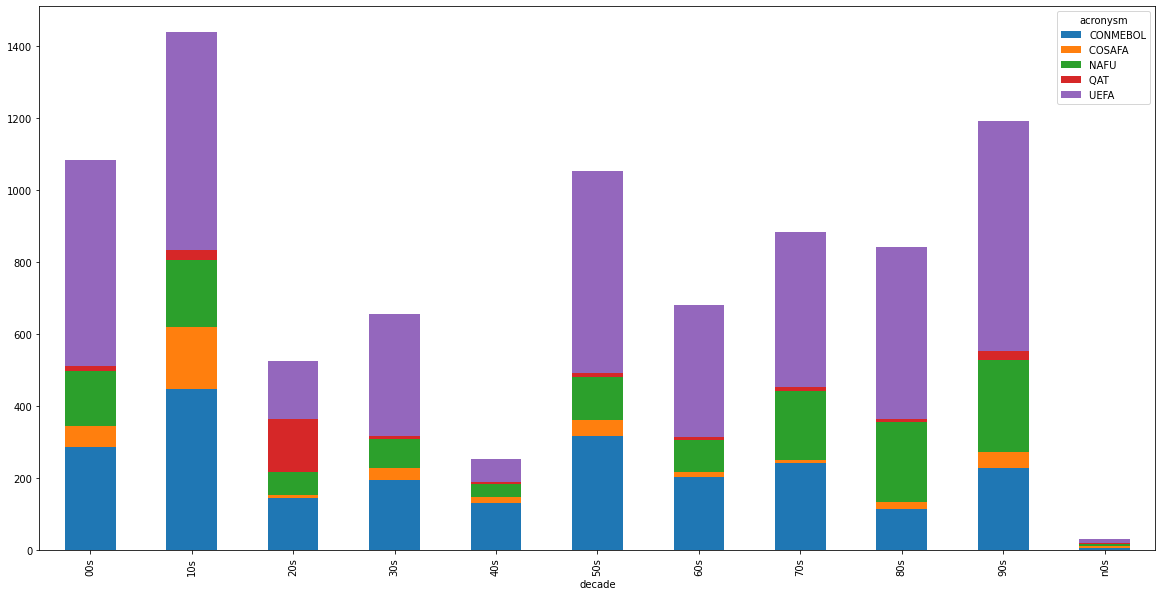

In [67]:
world_cup['acronysm'].groupby(world_cup['decade']).value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

<AxesSubplot: >

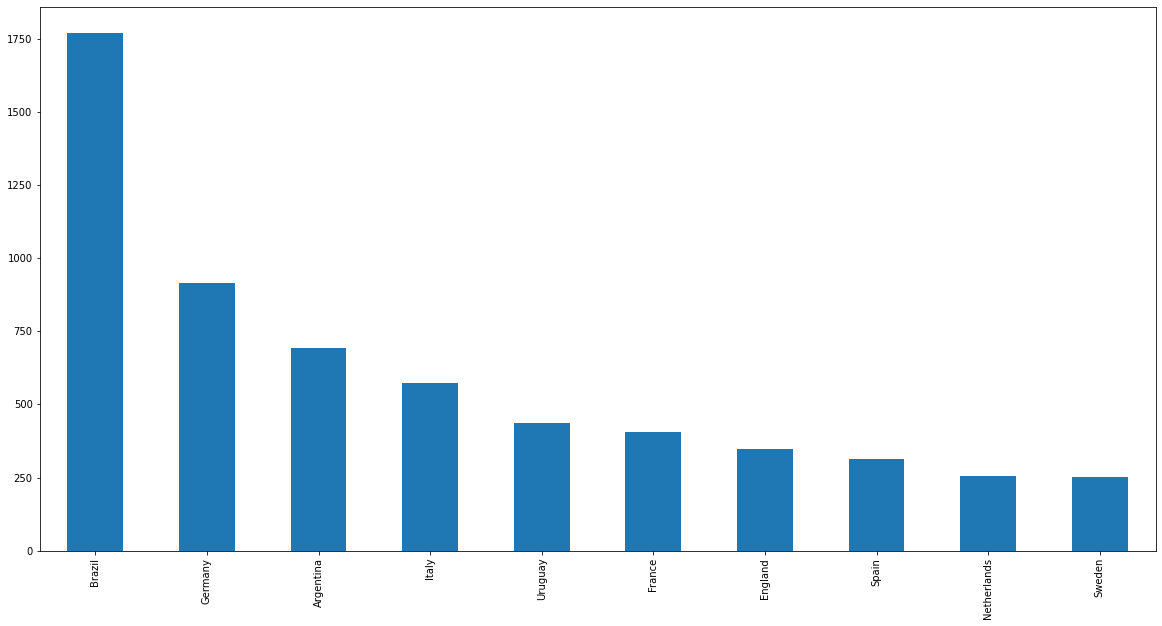

In [68]:
# most winning team
world_cup['winner'].value_counts().head(10).plot(kind='bar', figsize=(20, 10))

<AxesSubplot: >

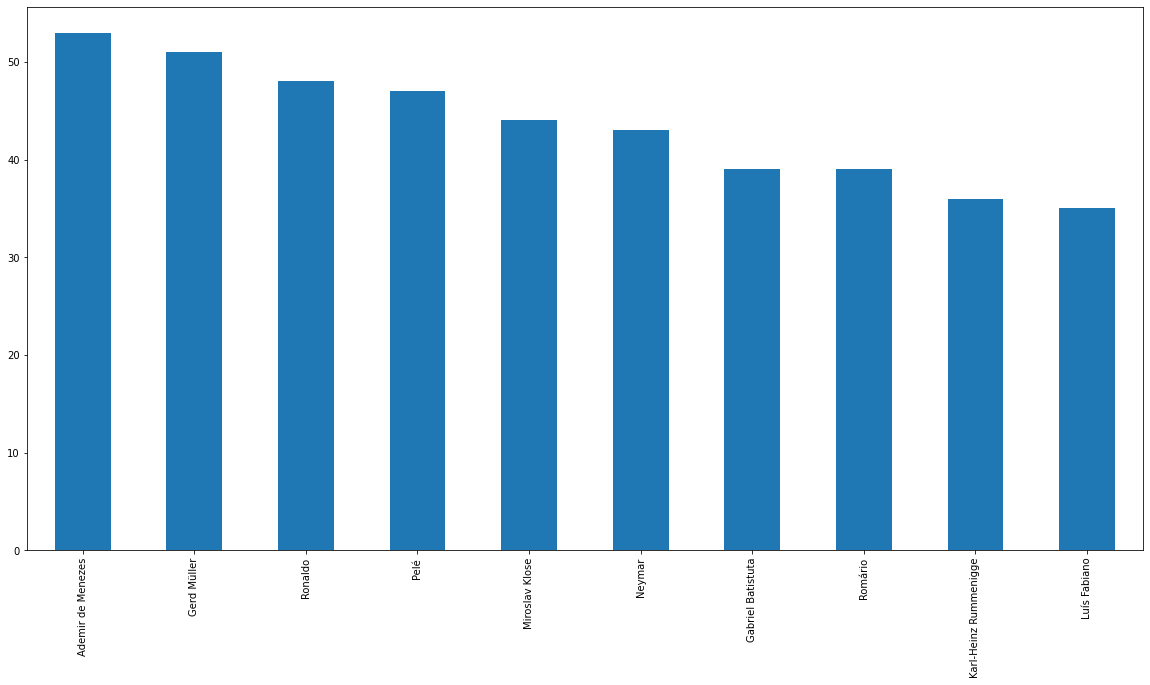

In [69]:
# best scorer
world_cup['scorer'].value_counts().head(10).plot(kind='bar', figsize=(20, 10))

<AxesSubplot: >

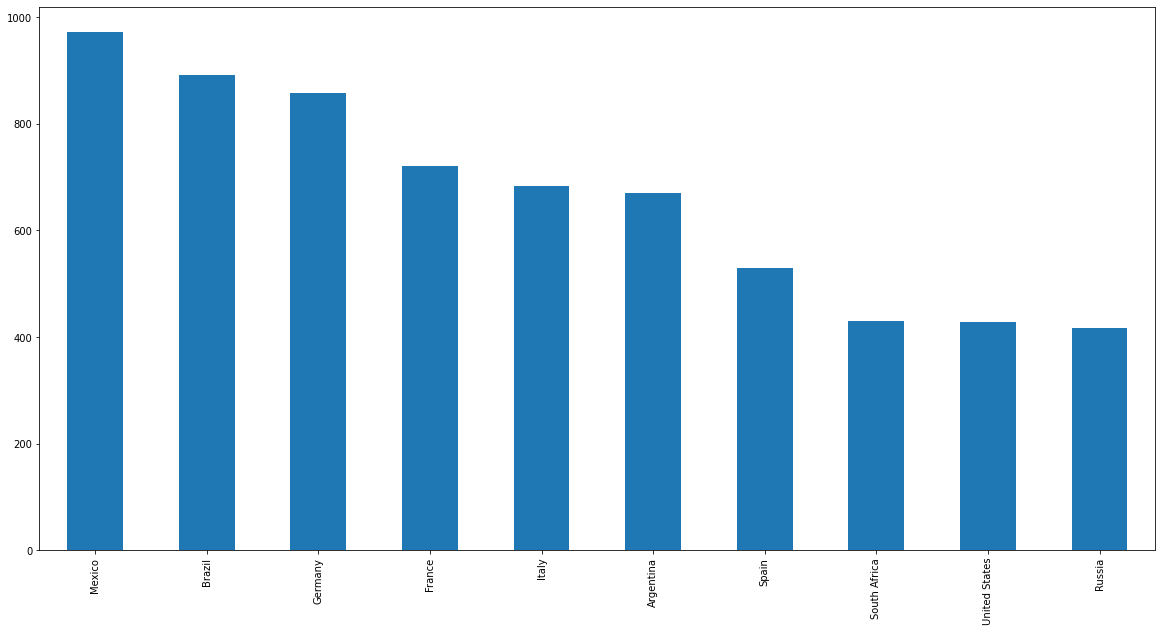

In [70]:
# matches per country
world_cup['country'].value_counts().head(10).plot(kind='bar', figsize=(20, 10))

<AxesSubplot: xlabel='team'>

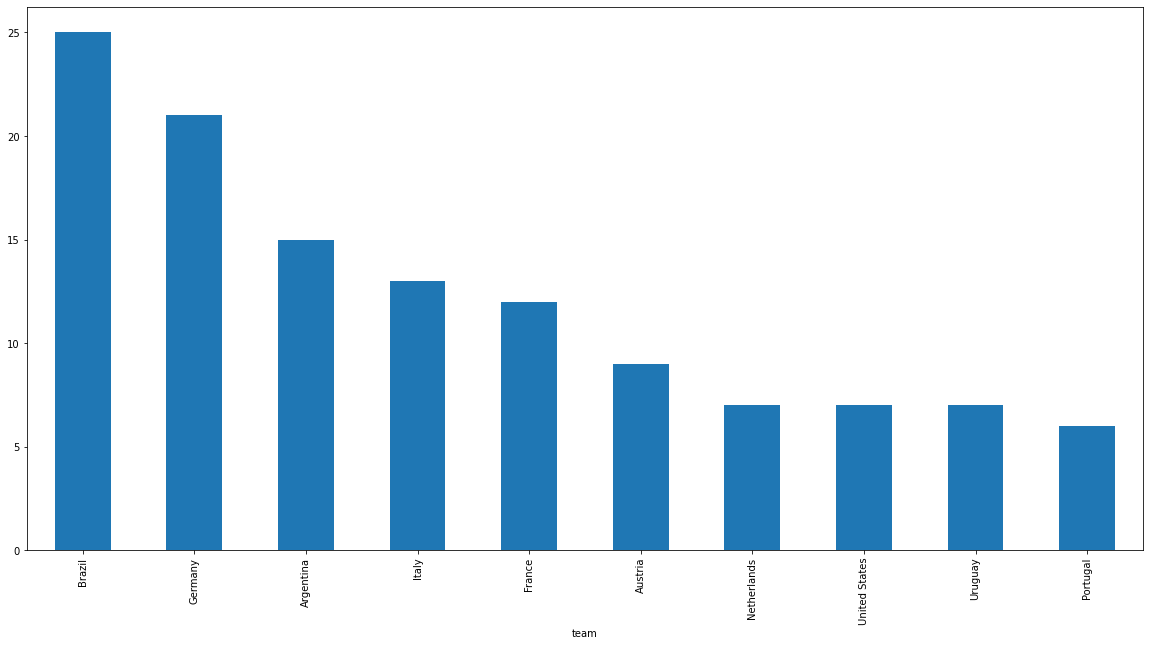

In [71]:
world_cup['own_goal'].groupby(world_cup['team']).sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20, 10))

In [72]:
# teams with most percentage of goals by penalty over the years dataframe
penalty = world_cup[['team', 'penalty', 'year', 'decade']].groupby(['team', 'year']).sum().reset_index()

<AxesSubplot: ylabel='penalty'>

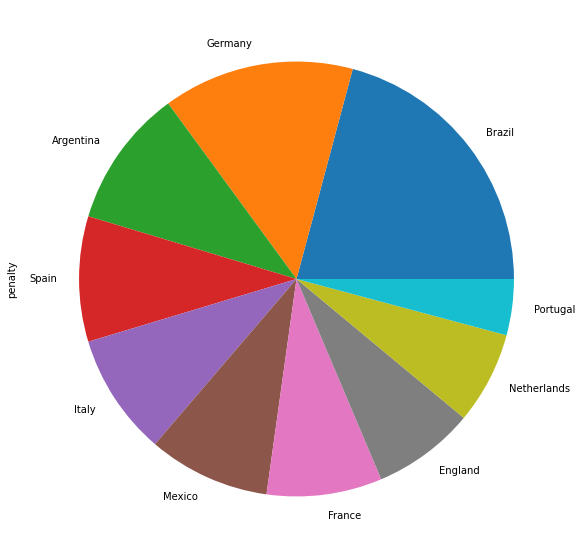

In [73]:
# percentage of goals by penalty
world_cup['penalty'].groupby(world_cup['team']).sum().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(20, 10))

In [74]:
# dict with cities and coordinates from cities dataframe
cities_dict = cities.set_index('city_ascii')['lat'].to_dict()